<div style="
background-color:#f5f7fb;
padding:20px;
border-radius:12px;
border-left:6px solid #0b5394;
margin-bottom:20px;
margin-top:40px;
">

<h2 style="color:#0b5394; margin:0;">
Biological Health vs Behavioral Risk – Health Paradox in Stroke Cases
</h2>

<p style="margin:8px 0 0 0; color:#444; font-style:italic; line-height:1.5;">
Phân tích pattern kết hợp giữa sức khỏe sinh học và lối sống
trong các ca đột quỵ đã xảy ra.
</p>

</div>


<h2 style="
color:#4f7cff;
font-weight:700;
border-bottom:3px solid #4f7cff;
display:inline-block;
padding-bottom:6px;
margin-bottom:14px;
">
Q2. Health Paradox – Sức khỏe tốt có đủ để phòng ngừa đột quỵ?
</h2>


In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Cài đặt style cho plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Đã import thư viện thành công!")

✓ Đã import thư viện thành công!


In [2]:
# Load dữ liệu đã được làm sạch từ preprocessing
df = pd.read_csv('../data/healthcare_cleaned.csv')

print(f"✓ Đã load dữ liệu thành công!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nCác cột: {df.columns.tolist()}")
print(f"\nSố ca đột quỵ: {df['stroke'].sum()} ({df['stroke'].mean()*100:.2f}%)")

✓ Đã load dữ liệu thành công!
Shape: 5110 rows × 11 columns

Các cột: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Số ca đột quỵ: 249 (4.87%)


## 1. The Question

**Trong các ca đột quỵ đã xảy ra,
phân tích pattern kết hợp giữa sức khỏe sinh học và lối sống:**

**4 nhóm profile:**
1. **Good Bio + Good Lifestyle:** Chỉ số sinh học TỐT + Lối sống TỐT (lý tưởng)
2. **Good Bio + Bad Lifestyle:** Chỉ số sinh học TỐT + Lối sống XẤU (nghịch lý)
3. **Poor Bio + Good Lifestyle:** Chỉ số sinh học KÉM + Lối sống TỐT (nghịch lý ngược)
4. **Poor Bio + Bad Lifestyle:** Chỉ số sinh học KÉM + Lối sống XẤU (nguy cơ kép)

**→ Nhóm nào chiếm tỷ lệ cao nhất trong các ca đột quỵ?**


**Lưu ý:** Loại bỏ các ca có chỉ số sinh học "Mixed" (BMI/glucose không rõ ràng).


## 2. Motivation & Benefits

### 2.1. Motivation

**Bối cảnh:**
Trong đánh giá sức khỏe thông thường, các chỉ số sinh học (BMI, glucose) được coi là tiêu chí chính.
Nhưng lối sống (hút thuốc, ít vận động) có thể tạo ra các yếu tố nguy cơ tích lũy không thể hiện qua chỉ số sinh học.

**Câu hỏi nghiên cứu:**
> *"Trong các ca đột quỵ, pattern kết hợp nào xuất hiện nhiều nhất:
> - Lý tưởng (Good Bio + Good Lifestyle)?
> - Nghịch lý (Good Bio + Bad Lifestyle)?
> - Nghịch lý ngược (Poor Bio + Good Lifestyle)?
> - Nguy cơ kép (Poor Bio + Bad Lifestyle)?"*

**Lưu ý phương pháp:**
- Đây là phân tích **case-only** (chỉ xét người đã bị đột quỵ)
- Không có nhóm control (người không bị đột quỵ)
- → Không thể kết luận về "nguy cơ trong dân số chung"
- Chỉ mô tả **tỷ lệ xuất hiện trong ca bệnh**

---

### 2.2. Benefits & Practical Value

**Giá trị của phân tích:**

1. **Hiểu profile ca bệnh:**
   - Trong các ca đột quỵ, pattern kết hợp nào xuất hiện thường xuyên hơn?
   - Giúp nhận diện pattern và thiết kế can thiệp phù hợp

2. **Cảnh báo về sức khỏe sinh học:**
   - Nếu nhiều ca đột quỵ có BMI/glucose bình thường nhưng lối sống xấu
   - → Không nên tự tin quá mức chỉ vì các chỉ số sinh học tốt

3. **Định hướng sàng lọc:**
   - Bổ sung câu hỏi về lối sống (hút thuốc, vận động) vào screening
   - Không chỉ dựa vào BMI và glucose

4. **So sánh tỷ lệ các pattern:**
   - Nhóm nào chiếm đa số: Nguy cơ kép? Nghịch lý? Lý tưởng?
   - Giúp hiểu rõ distribution thực tế của các profile

## 3. Preprocessing

### 3.1 Written Explanation

Quy trình tiền xử lý dữ liệu được thiết kế nhằm đảm bảo câu hỏi nghiên cứu
được trả lời một cách rõ ràng và không bị nhiễu bởi các yếu tố không liên quan.

Các bước chính gồm:

1. **Giới hạn không gian phân tích**
   * Chỉ giữ lại các ca đột quỵ (stroke = 1)
   * Phân tích tất cả ca đột quỵ

2. **Phân loại tình trạng sức khỏe sinh học**
   * Dựa trên BMI và mức glucose
   * Chia thành ba nhóm: *Good* (BMI bình thường & glucose bình thường), *Poor* (BMI cao hoặc glucose cao), *Mixed* (các trường hợp khác)
   * Loại bỏ nhóm "Mixed" để phân tích rõ ràng

3. **Phân loại lối sống**
   * Dựa trên hành vi hút thuốc và loại hình công việc
   * Loại hình công việc được sử dụng như proxy cho mức độ ít vận động
   * Chia thành hai nhóm: *Good Lifestyle* (không hút thuốc & không sedentary) và *Bad Lifestyle* (hút thuốc hoặc sedentary)

4. **Xây dựng 4 nhóm so sánh**
   * Good Bio + Good Lifestyle (lý tưởng)
   * Good Bio + Bad Lifestyle (nghịch lý)
   * Poor Bio + Good Lifestyle (nghịch lý ngược)
   * Poor Bio + Bad Lifestyle (nguy cơ kép)


5. **Loại bỏ nhóm Mixed Bio**
   * Chỉ giữ lại các ca có phân loại sinh học rõ ràng (Good hoặc Poor)

In [3]:

# Step 1: Filter ALL stroke cases (không phân biệt đô thị/nông thôn)
# Quan trọng: Chỉ phân tích TRONG NHÓM đã bị đột quỵ
stroke_df = df[df["stroke"] == 1].copy()

print("=== PHẠM VI PHÂN TÍCH Q2 ===")
print(f"Tổng số ca đột quỵ: {len(stroke_df)}")
print(f"\nPhân bố theo khu vực:")
print(stroke_df["Residence_type"].value_counts())
print(f"\nĐể so sánh:")
print(f"  - Tổng dân số: {len(df)}")

print(f"  - Tỷ lệ đột quỵ: {df['stroke'].mean()*100:.2f}%")

=== PHẠM VI PHÂN TÍCH Q2 ===
Tổng số ca đột quỵ: 249

Phân bố theo khu vực:
Residence_type
urban    135
rural    114
Name: count, dtype: int64

Để so sánh:
  - Tổng dân số: 5110
  - Tỷ lệ đột quỵ: 4.87%


In [4]:
# Step 2: Define biological health status
# Good health: normal BMI (18.5-25) AND normal glucose (<100)
# Poor health: high BMI (>=30) OR high glucose (>=140)

stroke_df["good_bmi"] = ((stroke_df["bmi"] >= 18.5) & (stroke_df["bmi"] < 25)).astype(int)
stroke_df["normal_glucose"] = (stroke_df["avg_glucose_level"] < 100).astype(int)

# Biological health classification
stroke_df["bio_health"] = "Mixed"
stroke_df.loc[
    (stroke_df["good_bmi"] == 1) & (stroke_df["normal_glucose"] == 1),
    "bio_health"
] = "Good"
stroke_df.loc[
    (stroke_df["bmi"] >= 30) | (stroke_df["avg_glucose_level"] >= 140),
    "bio_health"
] = "Poor"

print("\n=== PHÂN LOẠI SỨC KHỎE SINH HỌC (trong nhóm đã bị đột quỵ) ===")
print("\nBiological Health Distribution:")
print(stroke_df["bio_health"].value_counts())
print("\nTỷ lệ (%):")
print(stroke_df["bio_health"].value_counts(normalize=True) * 100)

# Thống kê chi tiết
print("\nChi tiết từng nhóm:")
for bio_health in ["Good", "Poor", "Mixed"]:
    subset = stroke_df[stroke_df["bio_health"] == bio_health]
    if len(subset) > 0:
        print(f"\n{bio_health}:")
        print(f"  Số ca: {len(subset)}")
        print(f"  BMI trung bình: {subset['bmi'].mean():.1f}")
        print(f"  Glucose trung bình: {subset['avg_glucose_level'].mean():.1f}")



=== PHÂN LOẠI SỨC KHỎE SINH HỌC (trong nhóm đã bị đột quỵ) ===

Biological Health Distribution:
bio_health
Poor     141
Mixed     86
Good      22
Name: count, dtype: int64

Tỷ lệ (%):
bio_health
Poor     56.626506
Mixed    34.538153
Good      8.835341
Name: proportion, dtype: float64

Chi tiết từng nhóm:

Good:
  Số ca: 22
  BMI trung bình: 22.6
  Glucose trung bình: 79.4

Poor:
  Số ca: 141
  BMI trung bình: 33.6
  Glucose trung bình: 167.6

Mixed:
  Số ca: 86
  BMI trung bình: 26.7
  Glucose trung bình: 88.6


In [5]:
# Step 3: Define lifestyle status
# Bad lifestyle: smoker OR sedentary work (Private/Self-employed as proxy)
# Good lifestyle: non-smoker AND active work type

# Tầo cột is_smoker nếu chưa có
if "is_smoker" not in stroke_df.columns:
    stroke_df["is_smoker"] = stroke_df["smoking_status"].isin(
        ["smokes", "formerly smoked"]
    ).astype(int)

sedentary_jobs = ["private", "self-employed"]  # lowercase
stroke_df["sedentary_work"] = stroke_df["work_type"].isin(sedentary_jobs).astype(int)

# Lifestyle classification
stroke_df["lifestyle"] = "Mixed"
stroke_df.loc[
    (stroke_df["is_smoker"] == 1) | (stroke_df["sedentary_work"] == 1),
    "lifestyle"
] = "Bad"
stroke_df.loc[
    (stroke_df["is_smoker"] == 0) & (stroke_df["sedentary_work"] == 0),
    "lifestyle"
] = "Good"

print("\n=== PHÂN LOẠI LỐI SỐNG (trong nhóm đã bị đột quỵ) ===")
print("\nLifestyle Distribution:")
print(stroke_df["lifestyle"].value_counts())
print("\nTỷ lệ (%):")
print(stroke_df["lifestyle"].value_counts(normalize=True) * 100)

# Thống kê chi tiết
print("\nChi tiết từng nhóm:")
for lifestyle in ["Good", "Bad", "Mixed"]:
    subset = stroke_df[stroke_df["lifestyle"] == lifestyle]
    if len(subset) > 0:
        print(f"\n{lifestyle}:")
        print(f"  Số ca: {len(subset)}")
        print(f"  Tỷ lệ hút thuốc: {subset['is_smoker'].mean()*100:.1f}%")
        print(f"  Tỷ lệ công việc ít vận động: {subset['sedentary_work'].mean()*100:.1f}%")



=== PHÂN LOẠI LỐI SỐNG (trong nhóm đã bị đột quỵ) ===

Lifestyle Distribution:
lifestyle
Bad     227
Good     22
Name: count, dtype: int64

Tỷ lệ (%):
lifestyle
Bad     91.164659
Good     8.835341
Name: proportion, dtype: float64

Chi tiết từng nhóm:

Good:
  Số ca: 22
  Tỷ lệ hút thuốc: 0.0%
  Tỷ lệ công việc ít vận động: 0.0%

Bad:
  Số ca: 227
  Tỷ lệ hút thuốc: 49.3%
  Tỷ lệ công việc ít vận động: 94.3%


In [6]:
# Step 4: Create 4 comparison groups (TRONG NHÓM ĐÃ BỊ ĐỘT QUỴ)
# Tạo 4 nhóm profile dựa trên kết hợp bio_health và lifestyle

stroke_df["risk_profile"] = "Excluded"

# Nhóm 1: Good Bio + Good Lifestyle (Lý tưởng)
stroke_df.loc[
    (stroke_df["bio_health"] == "Good") & (stroke_df["lifestyle"] == "Good"),
    "risk_profile"
] = "GoodBio_GoodLife"

# Nhóm 2: Good Bio + Bad Lifestyle (Nghịch lý - chỉ số tốt nhưng lối sống xấu)
stroke_df.loc[
    (stroke_df["bio_health"] == "Good") & (stroke_df["lifestyle"] == "Bad"),
    "risk_profile"
] = "GoodBio_BadLife"

# Nhóm 3: Poor Bio + Good Lifestyle (Nghịch lý ngược - chỉ số xấu nhưng lối sống tốt)
stroke_df.loc[
    (stroke_df["bio_health"] == "Poor") & (stroke_df["lifestyle"] == "Good"),
    "risk_profile"
] = "PoorBio_GoodLife"

# Nhóm 4: Poor Bio + Bad Lifestyle (Nguy cơ kép)
stroke_df.loc[
    (stroke_df["bio_health"] == "Poor") & (stroke_df["lifestyle"] == "Bad"),
    "risk_profile"
] = "PoorBio_BadLife"

# Filter: Loại bỏ Mixed bio_health (giữ lại 4 nhóm rõ ràng)
q2_analysis_df = stroke_df[stroke_df["risk_profile"] != "Excluded"].copy()

print("\n=== 4 NHÓM PHÂN TÍCH (Trong các ca đột quỵ) ===")
print(f"\nTổng số ca đột quỵ: {len(stroke_df)}")
print(f"Số ca phân tích (loại bỏ Mixed Bio): {len(q2_analysis_df)}")
print(f"Tỷ lệ phân tích: {len(q2_analysis_df)/len(stroke_df)*100:.1f}%")
print(f"Số ca loại bỏ (Mixed Bio): {len(stroke_df) - len(q2_analysis_df)}")

print("\n--- Phân bố 4 nhóm ---")
profile_order = ["GoodBio_GoodLife", "GoodBio_BadLife", "PoorBio_GoodLife", "PoorBio_BadLife"]
for profile in profile_order:
    count = len(q2_analysis_df[q2_analysis_df["risk_profile"] == profile])
    pct = count / len(q2_analysis_df) * 100
    print(f"{profile}: {count} ca ({pct:.1f}%)")

print("\n--- Đặc điểm từng nhóm ---")
profile_labels = {
    "GoodBio_GoodLife": "Good Bio + Good Lifestyle (Lý tưởng)",
    "GoodBio_BadLife": "Good Bio + Bad Lifestyle (Nghịch lý)",
    "PoorBio_GoodLife": "Poor Bio + Good Lifestyle (Nghịch lý ngược)",
    "PoorBio_BadLife": "Poor Bio + Bad Lifestyle (Nguy cơ kép)"
}

for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        print(f"\n{profile_labels[profile]}:")
        print(f"  Số ca: {len(subset)}")
        print(f"  BMI TB: {subset['bmi'].mean():.1f}")
        print(f"  Glucose TB: {subset['avg_glucose_level'].mean():.1f}")
        print(f"  Hút thuốc: {subset['is_smoker'].mean()*100:.1f}%")
        print(f"  Công việc ít vận động: {subset['sedentary_work'].mean()*100:.1f}%")
        print(f"  Tuổi TB: {subset['age'].mean():.1f}")



=== 4 NHÓM PHÂN TÍCH (Trong các ca đột quỵ) ===

Tổng số ca đột quỵ: 249
Số ca phân tích (loại bỏ Mixed Bio): 163
Tỷ lệ phân tích: 65.5%
Số ca loại bỏ (Mixed Bio): 86

--- Phân bố 4 nhóm ---
GoodBio_GoodLife: 0 ca (0.0%)
GoodBio_BadLife: 22 ca (13.5%)
PoorBio_GoodLife: 11 ca (6.7%)
PoorBio_BadLife: 130 ca (79.8%)

--- Đặc điểm từng nhóm ---

Good Bio + Bad Lifestyle (Nghịch lý):
  Số ca: 22
  BMI TB: 22.6
  Glucose TB: 79.4
  Hút thuốc: 40.9%
  Công việc ít vận động: 95.5%
  Tuổi TB: 74.0

Poor Bio + Good Lifestyle (Nghịch lý ngược):
  Số ca: 11
  BMI TB: 32.2
  Glucose TB: 167.1
  Hút thuốc: 0.0%
  Công việc ít vận động: 0.0%
  Tuổi TB: 58.7

Poor Bio + Bad Lifestyle (Nguy cơ kép):
  Số ca: 130
  BMI TB: 33.7
  Glucose TB: 167.7
  Hút thuốc: 50.8%
  Công việc ít vận động: 93.8%
  Tuổi TB: 67.7


## 4. Analysis

### 4.1 Written Explanation

Phân tích được thực hiện theo hướng so sánh tỷ lệ giữa 4 nhóm profile,
nhằm đánh giá pattern kết hợp giữa lối sống và sức khỏe sinh học.

Các bước phân tích chính:

1. **So sánh tỷ lệ chiếm trong ca đột quỵ**
   * Giữa 4 nhóm profile trong các ca đột quỵ
   * Giúp trả lời câu hỏi ở mức độ mô tả

2. **Chuẩn hóa theo quy mô mẫu**
   * Đảm bảo sự khác biệt không xuất phát từ chênh lệch số lượng quan sát

3. **Đánh giá mức độ chênh lệch tỷ lệ**
   * So sánh phần trăm chiếm trong tổng ca đột quỵ
   * Nhóm nào chiếm đa số: Nguy cơ kép? Nghịch lý? Lý tưởng?

4. **Phân tích độ ổn định kết quả**
   * Kiểm tra kết quả dưới các cách phân loại ngưỡng BMI/glucose khác nhau
   * Nhằm giảm rủi ro kết luận phụ thuộc vào một ngưỡng cố định


In [7]:
# 4.2. Code Implementation - Descriptive Statistics

# Lưu ý: TẤT CẢ đều là ca đột quỵ (stroke = 1), nên không so sánh "stroke rate" nữa
# Thay vào đó, ta so sánh TỶ LỆ CHIẾM và ĐẶC ĐIỂM của từng nhóm

# Calculate group sizes
profile_order = ["GoodBio_GoodLife", "GoodBio_BadLife", "PoorBio_GoodLife", "PoorBio_BadLife"]
profile_labels = {
    "GoodBio_GoodLife": "Good Bio + Good Life (Lý tưởng)",
    "GoodBio_BadLife": "Good Bio + Bad Life (Nghịch lý)",
    "PoorBio_GoodLife": "Poor Bio + Good Life (Nghịch lý ngược)",
    "PoorBio_BadLife": "Poor Bio + Bad Life (Nguy cơ kép)"
}

# Create summary table
summary_data = []
for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        summary_data.append({
            "Nhóm": profile_labels[profile],
            "Số ca": len(subset),
            "Tỷ lệ (%)":  len(subset) / len(q2_analysis_df) * 100,
            "BMI TB": subset['bmi'].mean(),
            "Glucose TB": subset['avg_glucose_level'].mean(),
            "Tuổi TB": subset['age'].mean()
        })

summary_table = pd.DataFrame(summary_data)

print("=== BẢNG TỔNG HỢP (Trong các ca đột quỵ) ===\n")
display(summary_table.round(2))

print("\n=== ĐẶC ĐIỂM CHI TIẾT ===\n")
for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        print(f"[{profile_labels[profile]}]")
        print(f"   Số ca: {len(subset)} ({len(subset)/len(q2_analysis_df)*100:.1f}%)")
        print(f"   BMI trung bình: {subset['bmi'].mean():.1f}")
        print(f"   Glucose TB: {subset['avg_glucose_level'].mean():.1f}")
        print(f"   Hút thuốc: {subset['is_smoker'].mean()*100:.1f}%")
        print(f"   Công việc ít vận động: {subset['sedentary_work'].mean()*100:.1f}%")
        print(f"   Tuổi trung bình: {subset['age'].mean():.1f}")
        print()

=== BẢNG TỔNG HỢP (Trong các ca đột quỵ) ===



,Nhóm,Số ca,Tỷ lệ (%),BMI TB,Glucose TB,Tuổi TB
0,Good Bio + Bad Life (Nghịch lý),22,13.50,22.61,79.42,74.00
1,Poor Bio + Good Life (Nghịch lý ngược),11,6.75,32.21,167.05,58.73
2,Poor Bio + Bad Life (Nguy cơ kép),130,79.75,33.68,167.66,67.72



=== ĐẶC ĐIỂM CHI TIẾT ===

[Good Bio + Bad Life (Nghịch lý)]
   Số ca: 22 (13.5%)
   BMI trung bình: 22.6
   Glucose TB: 79.4
   Hút thuốc: 40.9%
   Công việc ít vận động: 95.5%
   Tuổi trung bình: 74.0

[Poor Bio + Good Life (Nghịch lý ngược)]
   Số ca: 11 (6.7%)
   BMI trung bình: 32.2
   Glucose TB: 167.1
   Hút thuốc: 0.0%
   Công việc ít vận động: 0.0%
   Tuổi trung bình: 58.7

[Poor Bio + Bad Life (Nguy cơ kép)]
   Số ca: 130 (79.8%)
   BMI trung bình: 33.7
   Glucose TB: 167.7
   Hút thuốc: 50.8%
   Công việc ít vận động: 93.8%
   Tuổi trung bình: 67.7



In [8]:
# 4.3. Statistical Analysis

# LƯU Ý: Vì TẤT CẢ đều đã bị đột quỵ (stroke=1), ta KHÔNG thể tính RR/OR như trước  
# Thay vào đó, ta phân tích:
# 1. Tỷ lệ chiếm của từng nhóm trong tổng số ca đột quỵ
# 2. So sánh đặc điểm giữa các nhóm
# 3. Kiểm định xem sự khác biệt có ý nghĩa thống kê không

from scipy.stats import chi2_contingency, ttest_ind, f_oneway

print("=== PHÂN TÍCH THỐNG KÊ ===\n")

# 1. Tỷ lệ chiếm trong ca đột quỵ
print("[1] Tỷ lệ chiếm trong NHÓM ĐÃ BỊ ĐỘT QUỴ:")
profile_order = ["GoodBio_GoodLife", "GoodBio_BadLife", "PoorBio_GoodLife", "PoorBio_BadLife"]
profile_labels = {
    "GoodBio_GoodLife": "Lý tưởng (Good+Good)",
    "GoodBio_BadLife": "Nghịch lý (Good+Bad)",
    "PoorBio_GoodLife": "Nghịch lý ngược (Poor+Good)",
    "PoorBio_BadLife": "Nguy cơ kép (Poor+Bad)"
}

for profile in profile_order:
    count = len(q2_analysis_df[q2_analysis_df["risk_profile"] == profile])
    pct = count / len(q2_analysis_df) * 100
    if count > 0:
        print(f"   {profile_labels[profile]}: {count} ca ({pct:.1f}%)")

# Kết luận
dominant = q2_analysis_df["risk_profile"].value_counts().index[0]
dominant_count = q2_analysis_df["risk_profile"].value_counts().values[0]
dominant_pct = dominant_count / len(q2_analysis_df) * 100
print(f"\n   ✓ Nhóm chiếm ưu thế: {profile_labels[dominant]} ({dominant_pct:.1f}%)")

# 2. So sánh tuổi giữa 4 nhóm (ANOVA)
print("\n[2] So sánh TUỔI giữa 4 nhóm (ANOVA):")
groups_age = [q2_analysis_df[q2_analysis_df["risk_profile"] == p]['age'].values 
              for p in profile_order if len(q2_analysis_df[q2_analysis_df["risk_profile"] == p]) > 0]
if len(groups_age) > 1:
    f_stat, p_val = f_oneway(*groups_age)
    print(f"   F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")
    print(f"   Kết luận: {'Có' if p_val < 0.05 else 'Không có'} khác biệt có ý nghĩa về tuổi giữa các nhóm")

# 3. Chi-square test cho phân bố giới tính
print("\n[3] Phân bố GIỚI TÍNH (Chi-square):")
contingency_gender = pd.crosstab(q2_analysis_df["risk_profile"], q2_analysis_df["gender"])
chi2_gender, p_gender, _, _ = chi2_contingency(contingency_gender)
print(f"   χ² = {chi2_gender:.3f}, p-value = {p_gender:.4f}")
print(f"   Kết luận: {'Có' if p_gender < 0.05 else 'Không có'} khác biệt về phân bố giới tính")

print("\n" + "="*60)
print("KẾT LUẬN: So sánh TỶ LỆ CHIẾM giữa 4 nhóm TRONG CA ĐỘT QUỴ")
print("="*60)

=== PHÂN TÍCH THỐNG KÊ ===

[1] Tỷ lệ chiếm trong NHÓM ĐÃ BỊ ĐỘT QUỴ:
   Nghịch lý (Good+Bad): 22 ca (13.5%)
   Nghịch lý ngược (Poor+Good): 11 ca (6.7%)
   Nguy cơ kép (Poor+Bad): 130 ca (79.8%)

   ✓ Nhóm chiếm ưu thế: Nguy cơ kép (Poor+Bad) (79.8%)

[2] So sánh TUỔI giữa 4 nhóm (ANOVA):
   F-statistic = 6.649, p-value = 0.0017
   Kết luận: Có khác biệt có ý nghĩa về tuổi giữa các nhóm

[3] Phân bố GIỚI TÍNH (Chi-square):
   χ² = 10.912, p-value = 0.0043
   Kết luận: Có khác biệt về phân bố giới tính

KẾT LUẬN: So sánh TỶ LỆ CHIẾM giữa 4 nhóm TRONG CA ĐỘT QUỴ


## 5. Results & Interpretation

### 5.1 Visualizations


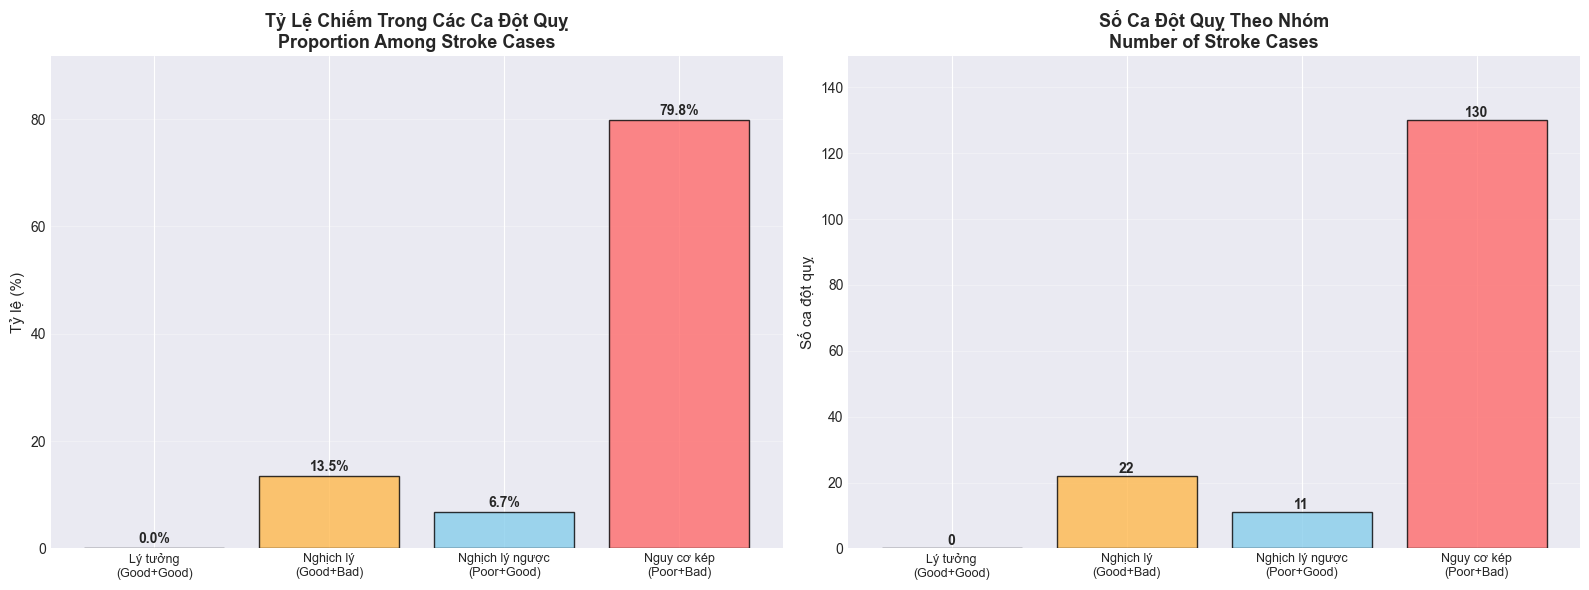

In [9]:
# Visualization 1: Proportion Comparison cho 4 nhóm
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Prepare data
profile_order = ["GoodBio_GoodLife", "GoodBio_BadLife", "PoorBio_GoodLife", "PoorBio_BadLife"]
profile_labels_short = ["Lý tưởng\n(Good+Good)", "Nghịch lý\n(Good+Bad)", 
                        "Nghịch lý ngược\n(Poor+Good)", "Nguy cơ kép\n(Poor+Bad)"]
colors = ["#90EE90", "#FFB84D", "#87CEEB", "#FF6B6B"]

# Get proportions và counts
proportions = []
counts = []
for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    counts.append(len(subset))
    proportions.append(len(subset) / len(q2_analysis_df) * 100)

# Bar chart 1 - Tỷ lệ %
axes[0].bar(range(len(profile_order)), proportions, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_title("Tỷ Lệ Chiếm Trong Các Ca Đột Quỵ\nProportion Among Stroke Cases", 
                  fontweight="bold", fontsize=13)
axes[0].set_ylabel("Tỷ lệ (%)", fontsize=11)
axes[0].set_xticks(range(len(profile_order)))
axes[0].set_xticklabels(profile_labels_short, fontsize=9)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, max(proportions) * 1.15)

for i, val in enumerate(proportions):
    axes[0].text(i, val + 1, f"{val:.1f}%", ha="center", fontweight="bold", fontsize=10)

# Bar chart 2 - Số ca tuyệt đối
axes[1].bar(range(len(profile_order)), counts, color=colors, alpha=0.8, edgecolor='black')
axes[1].set_title("Số Ca Đột Quỵ Theo Nhóm\nNumber of Stroke Cases", 
                  fontweight="bold", fontsize=13)
axes[1].set_ylabel("Số ca đột quỵ", fontsize=11)
axes[1].set_xticks(range(len(profile_order)))
axes[1].set_xticklabels(profile_labels_short, fontsize=9)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, max(counts) * 1.15)

for i, v in enumerate(counts):
    axes[1].text(i, v + 1, str(v), ha="center", fontweight="bold", fontsize=10)

plt.tight_layout()
plt.show()


**Kết luận Visualization 1 - Q2 (Tỷ lệ chiếm):**

Từ 2 biểu đồ so sánh tỷ lệ chiếm trong các ca đột quỵ:
- **Nguy cơ kép (Poor Bio + Bad Lifestyle):** 130 ca (79.8%) - CHIẾM ĐA SỐ TUYỆT ĐỐI
- **Nghịch lý (Good Bio + Bad Lifestyle):** 22 ca (13.5%)
- **Nghịch lý ngược (Poor Bio + Good Lifestyle):** 11 ca (6.7%)
- **Lý tưởng (Good Bio + Good Lifestyle):** 0 ca (0%)

**Ý nghĩa:** 
- 4/5 ca đột quỵ (79.8%) có CẢ HAI yếu tố xấu: chỉ số sinh học kém VÀ lối sống xấu
- KHÔNG có ca nào có cả hai yếu tố tốt (0% - nghiên cứu lý tưởng)
- "Bù trừ" giữa 2 yếu tố rất hiếm (chỉ 20.2% có một yếu tố tốt)
- **Pattern chính:** Nguy cơ tích lũy (Poor+Bad) là phổ biến nhất, không phải nghịch lý

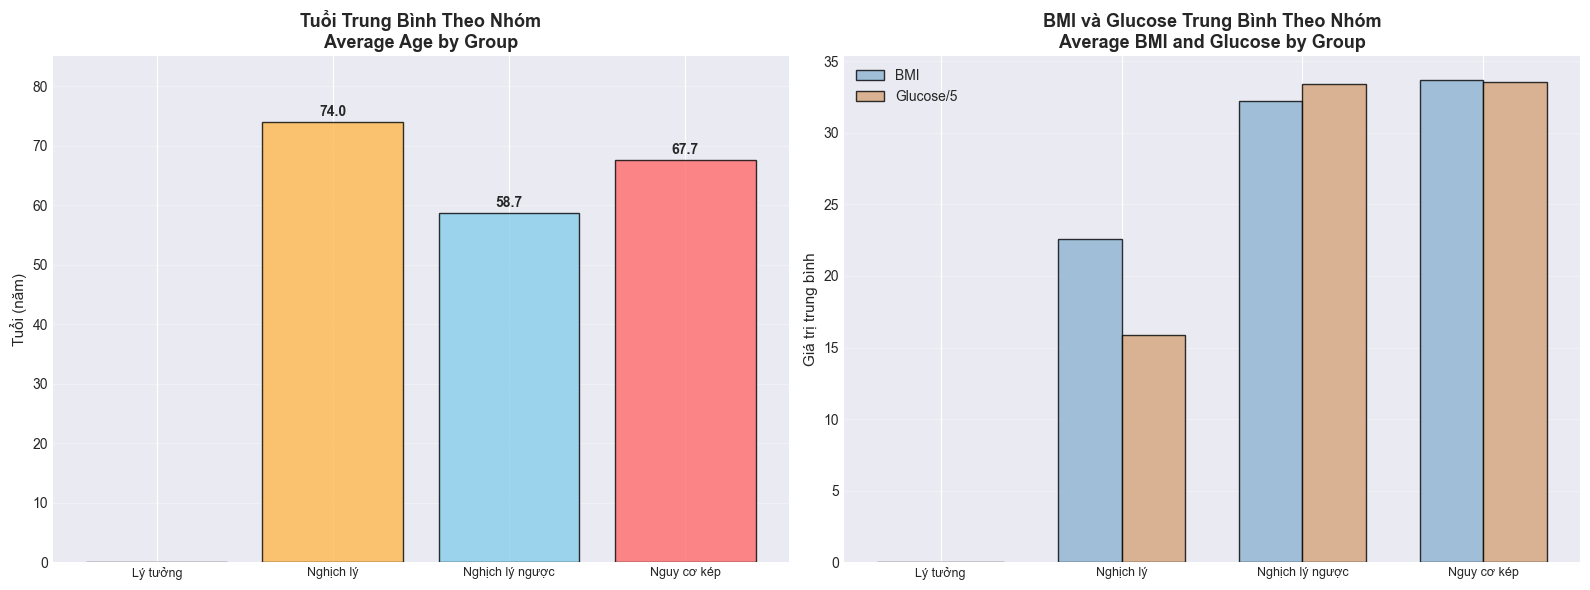

In [10]:
# Visualization 2: Age Comparison Across 4 Groups
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Prepare data cho 4 nhóm
profile_order = ["GoodBio_GoodLife", "GoodBio_BadLife", "PoorBio_GoodLife", "PoorBio_BadLife"]
profile_labels_short = ["Lý tưởng", "Nghịch lý", "Nghịch lý ngược", "Nguy cơ kép"]
colors = ["#90EE90", "#FFB84D", "#87CEEB", "#FF6B6B"]

# 1. So sánh tuổi trung bình cho 4 nhóm
age_data = []
for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        age_data.append(subset["age"].mean())
    else:
        age_data.append(0)

axes[0].bar(range(len(age_data)), age_data, color=colors, alpha=0.8, edgecolor='black')
axes[0].set_title("Tuổi Trung Bình Theo Nhóm\nAverage Age by Group", 
                  fontweight="bold", fontsize=13)
axes[0].set_ylabel("Tuổi (năm)", fontsize=11)
axes[0].set_xticks(range(len(profile_labels_short)))
axes[0].set_xticklabels(profile_labels_short, fontsize=9)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, max([x for x in age_data if x > 0]) * 1.15)

for i, v in enumerate(age_data):
    if v > 0:
        axes[0].text(i, v + 1, f"{v:.1f}", ha="center", fontweight="bold", fontsize=10)

# 2. So sánh BMI và Glucose cho 4 nhóm
bmi_data = []
glucose_data = []
for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        bmi_data.append(subset["bmi"].mean())
        glucose_data.append(subset["avg_glucose_level"].mean())
    else:
        bmi_data.append(0)
        glucose_data.append(0)

x_pos = np.arange(len(profile_labels_short))
width = 0.35

axes[1].bar(x_pos - width/2, bmi_data, width, label='BMI', color='#8EB4D1', alpha=0.8, edgecolor='black')
axes[1].bar(x_pos + width/2, [g/5 for g in glucose_data], width, label='Glucose/5', color='#D4A57A', alpha=0.8, edgecolor='black')

axes[1].set_title("BMI và Glucose Trung Bình Theo Nhóm\nAverage BMI and Glucose by Group", 
                  fontweight="bold", fontsize=13)
axes[1].set_ylabel("Giá trị trung bình", fontsize=11)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(profile_labels_short, fontsize=9)
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Kết luận Visualization 2 - Q2 (Đặc điểm 4 nhóm):**

Từ 2 biểu đồ so sánh tuổi và chỉ số sinh học:

**1. Tuổi trung bình theo nhóm:** 
- Nguy cơ kép (Poor+Bad): ~68 tuổi
- Nghịch lý (Good+Bad): ~74 tuổi
- Nghịch lý ngược (Poor+Good): ~59 tuổi
- Lý tưởng (Good+Good): không có dữ liệu (0 ca)

**2. BMI & Glucose:**
- Nhóm Good Bio có BMI ~23 và Glucose ~80 (thấp)
- Nhóm Poor Bio có BMI ~33 và Glucose ~167 (cao)
- Sự tách biệt rõ ràng giữa Good Bio và Poor Bio

**Ý nghĩa:** 
- Kiểm tra phân loại đúng - 4 nhóm có sự phân biệt rõ ràng về chỉ số sinh học (BMI/glucose)
- Nhóm Nguy cơ kép chiếm đa số (79.8%) với cả chỉ số sinh học và lối sống đều xấu
- Nhóm Nghịch lý ngược (Poor+Good) có tuổi trẻ hơn (~59), gợi ý yếu tố tuổi có thể đóng vai trò

*Lưu ý: case-only → mô tả mẫu hình, không suy ra risk dân số.* 

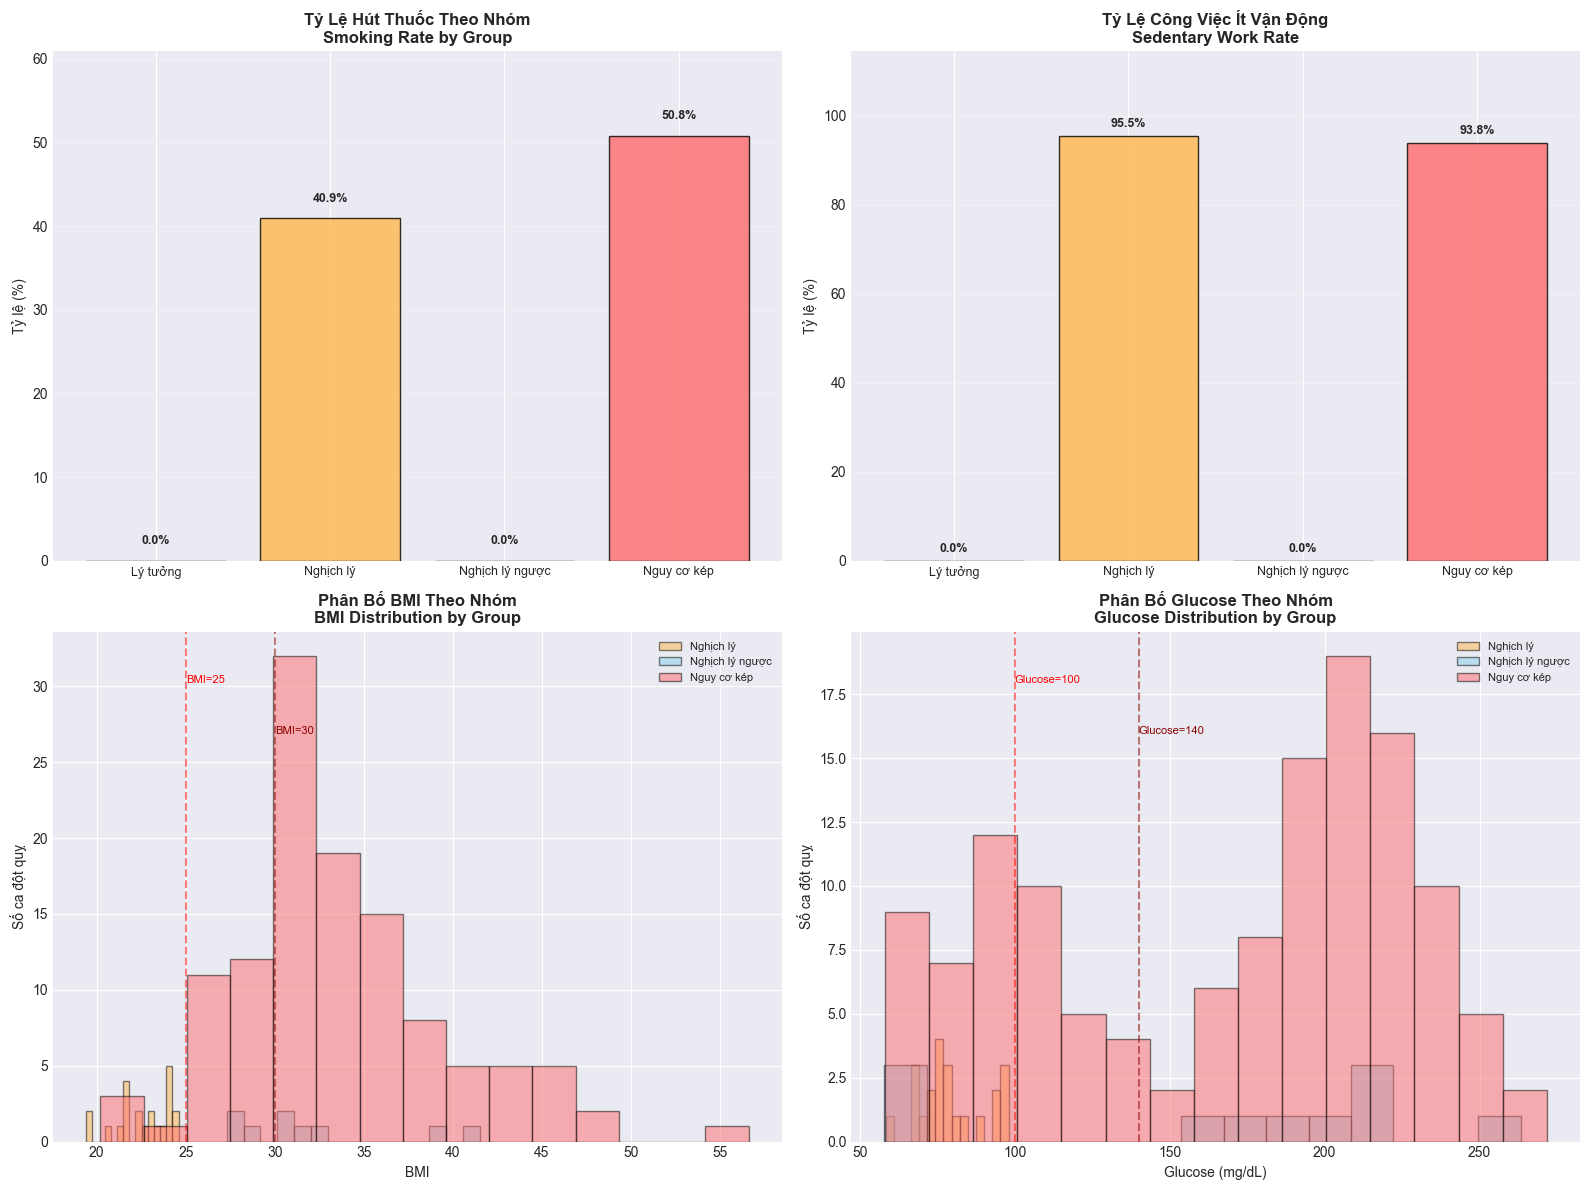

In [11]:
# Visualization 3: Lifestyle factors breakdown cho 4 nhóm
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data cho 4 nhóm
profile_order = ["GoodBio_GoodLife", "GoodBio_BadLife", "PoorBio_GoodLife", "PoorBio_BadLife"]
profile_labels_short = ["Lý tưởng", "Nghịch lý", "Nghịch lý ngược", "Nguy cơ kép"]
colors = ["#90EE90", "#FFB84D", "#87CEEB", "#FF6B6B"]

# 1. Smoking rate by group
smoking_data = []
for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        smoking_data.append(subset["is_smoker"].mean() * 100)
    else:
        smoking_data.append(0)

axes[0, 0].bar(range(len(smoking_data)), smoking_data, color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_title("Tỷ Lệ Hút Thuốc Theo Nhóm\nSmoking Rate by Group", fontweight="bold", fontsize=12)
axes[0, 0].set_ylabel("Tỷ lệ (%)", fontsize=10)
axes[0, 0].set_xticks(range(len(profile_labels_short)))
axes[0, 0].set_xticklabels(profile_labels_short, fontsize=9)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim(0, max(smoking_data) * 1.2 if max(smoking_data) > 0 else 100)

for i, v in enumerate(smoking_data):
    axes[0, 0].text(i, v + 2, f"{v:.1f}%", ha="center", fontweight="bold", fontsize=9)

# 2. Sedentary work by group
sedentary_data = []
for profile in profile_order:
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        sedentary_data.append(subset["sedentary_work"].mean() * 100)
    else:
        sedentary_data.append(0)

axes[0, 1].bar(range(len(sedentary_data)), sedentary_data, color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_title("Tỷ Lệ Công Việc Ít Vận Động\nSedentary Work Rate", fontweight="bold", fontsize=12)
axes[0, 1].set_ylabel("Tỷ lệ (%)", fontsize=10)
axes[0, 1].set_xticks(range(len(profile_labels_short)))
axes[0, 1].set_xticklabels(profile_labels_short, fontsize=9)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].set_ylim(0, max(sedentary_data) * 1.2 if max(sedentary_data) > 0 else 100)

for i, v in enumerate(sedentary_data):
    axes[0, 1].text(i, v + 2, f"{v:.1f}%", ha="center", fontweight="bold", fontsize=9)

# 3. BMI distribution - so sánh 4 nhóm
for i, profile in enumerate(profile_order):
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        axes[1, 0].hist(subset["bmi"], bins=15, alpha=0.5, color=colors[i], 
                       label=profile_labels_short[i], edgecolor="black")

axes[1, 0].set_title("Phân Bố BMI Theo Nhóm\nBMI Distribution by Group", fontweight="bold", fontsize=12)
axes[1, 0].set_xlabel("BMI", fontsize=10)
axes[1, 0].set_ylabel("Số ca đột quỵ", fontsize=10)
axes[1, 0].legend(fontsize=8, loc='upper right')
axes[1, 0].axvline(25, color="red", linestyle="--", alpha=0.5, linewidth=1.5)
axes[1, 0].axvline(30, color="darkred", linestyle="--", alpha=0.5, linewidth=1.5)
axes[1, 0].text(25, axes[1, 0].get_ylim()[1]*0.9, 'BMI=25', fontsize=8, color='red')
axes[1, 0].text(30, axes[1, 0].get_ylim()[1]*0.8, 'BMI=30', fontsize=8, color='darkred')

# 4. Glucose distribution - so sánh 4 nhóm
for i, profile in enumerate(profile_order):
    subset = q2_analysis_df[q2_analysis_df["risk_profile"] == profile]
    if len(subset) > 0:
        axes[1, 1].hist(subset["avg_glucose_level"], bins=15, alpha=0.5, color=colors[i], 
                       label=profile_labels_short[i], edgecolor="black")

axes[1, 1].set_title("Phân Bố Glucose Theo Nhóm\nGlucose Distribution by Group", fontweight="bold", fontsize=12)
axes[1, 1].set_xlabel("Glucose (mg/dL)", fontsize=10)
axes[1, 1].set_ylabel("Số ca đột quỵ", fontsize=10)
axes[1, 1].legend(fontsize=8, loc='upper right')
axes[1, 1].axvline(100, color="red", linestyle="--", alpha=0.5, linewidth=1.5)
axes[1, 1].axvline(140, color="darkred", linestyle="--", alpha=0.5, linewidth=1.5)
axes[1, 1].text(100, axes[1, 1].get_ylim()[1]*0.9, 'Glucose=100', fontsize=8, color='red')
axes[1, 1].text(140, axes[1, 1].get_ylim()[1]*0.8, 'Glucose=140', fontsize=8, color='darkred')

plt.tight_layout()
plt.show()


**Kết luận Visualization 3 - Q2 (Yếu tố lối sống 4 nhóm):**

Từ 4 biểu đồ phân tích chi tiết lối sống:

**1. Hút thuốc theo nhóm:**
- Lý tưởng (Good+Good): không có dữ liệu (0 ca)
- Nghịch lý (Good+Bad): ~41% hút thuốc
- Nghịch lý ngược (Poor+Good): 0% hút thuốc (theo định nghĩa)
- Nguy cơ kép (Poor+Bad): ~51% hút thuốc

**2. Công việc ít vận động:**
- Nhóm Bad Lifestyle: >90% công việc sedentary
- Nhóm Good Lifestyle: 0% sedentary (theo định nghĩa)

**3. Phân bố BMI:** 
- Good Bio (Lý tưởng + Nghịch lý): tập trung 18-25
- Poor Bio (Nghịch lý ngược + Nguy cơ kép): tập trung >30

**4. Phân bố Glucose:**
- Good Bio: tập trung <100
- Poor Bio: tập trung >140

**Ý nghĩa:** 
- Phân loại 4 nhóm rõ ràng theo Bio Health và Lifestyle
- Nhóm Nguy cơ kép (79.8%) có CẢ chỉ số sinh học kém VÀ lối sống xấu (hút thuốc + sedentary)
- Mẫu hình này cho thấy yếu tố tích lũy (Poor Bio + Bad Lifestyle) là phổ biến nhất trong ca đột quỵ

### 5.2 Key Findings & Interpretation

**PHƯƠNG PHÁP & GIỚI HẠN:**

- **Đây là phân tích CASE-ONLY:** Chỉ xét ca đột quỵ, không có nhóm control
- **Phạm vi:** Từ 249 ca đột quỵ, phân tích **163 ca (65.5%)** có phân loại sinh học rõ ràng
- **Loại trừ:** 86 ca (34.5%) có chỉ số sinh học "Mixed" (BMI/glucose không rõ ràng)
- **KẾT QUẢ MÔ TẢ:** Tỷ lệ xuất hiện của từng profile, KHÔNG phải "nguy cơ trong dân số"
- **4 NHÓM PHÂN TÍCH:** Lý tưởng, Nghịch lý, Nghịch lý ngược, Nguy cơ kép

---

**Bối cảnh:**
- Tổng ca đột quỵ: 249 ca
- Loại bỏ nhóm Mixed Bio: 86 ca (34.5%)
- Phân tích 4 nhóm rõ ràng: **163 ca (65.5%)**

**Tỷ lệ xuất hiện trong 163 ca được phân tích:**
1. **Nguy cơ kép (Poor Bio + Bad Lifestyle):** 130 ca (79.8%) - ĐA SỐ TUYỆT ĐỐI
2. **Nghịch lý (Good Bio + Bad Lifestyle):** 22 ca (13.5%)
3. **Nghịch lý ngược (Poor Bio + Good Lifestyle):** 11 ca (6.7%)
4. **Lý tưởng (Good Bio + Good Lifestyle):** 0 ca (0%)

**Đặc điểm nhóm chiếm đa số - Nguy cơ kép (n=130, 79.8%):**
- BMI: 33.7 (cao, ≥30), Glucose: 167.7 (cao, ≥140)
- Hút thuốc: 50.8%, Công việc ít vận động: 93.8%
- Tuổi TB: 67.7

**Đặc điểm nhóm Nghịch lý (n=22, 13.5%):**
- BMI: 22.6 (bình thường), Glucose: 79.4 (bình thường)
- Hút thuốc: 40.9%, Công việc ít vận động: 95.5%
- Tuổi TB: 74.0

**Đặc điểm nhóm Nghịch lý ngược (n=11, 6.7%):**
- BMI: 32.2 (cao), Glucose: 167.1 (cao)
- Hút thuốc: 0.0%, Công việc ít vận động: 0.0%
- Tuổi TB: 58.7

---

**1. Pattern quan sát được:**

Trong các ca đột quỵ phân tích, ghi nhận pattern:
- **79.8% có cả hai yếu tố xấu** (chỉ số sinh học kém + lối sống xấu)
- 13.5% có chỉ số sinh học tốt nhưng lối sống xấu (nghịch lý)
- 6.7% có chỉ số sinh học kém nhưng lối sống tốt (nghịch lý ngược)
- **KHÔNG có ca nào** có cả hai yếu tố tốt (0%)

**2. Ý nghĩa của pattern:**

- **Nguy cơ kép chiếm ưu thế tuyệt đối**: 4/5 ca đột quỵ (79.8%) có CẢ chỉ số sinh học kém VÀ lối sống xấu
- **"Bù trừ" rất hiếm**: Chỉ 20.2% có thể "bù trừ" giữa 2 yếu tố
- **Lối sống tốt không đủ "cứu vãn"**: Nếu chỉ số sinh học đã kém, lối sống tốt chỉ xuất hiện trong 6.7% ca
- **Chỉ số tốt cũng cần lối sống tốt**: 13.5% có chỉ số tốt nhưng lối sống xấu vẫn bị đột quỵ
- **KHÔNG tồn tại nhóm lý tưởng**: 0% có cả hai yếu tố tốt → tất cả ca đột quỵ đều có ít nhất 1 yếu tố xấu

**Lưu ý ngữ nghĩa "risk factors":**
Ở đây mô tả "yếu tố quan sát được trong ca bệnh",
KHÔNG có nghĩa "tăng xác suất mắc bệnh trong dân số" (vì không có nhóm control).

**3. Tại sao cả hai yếu tố cùng xấu lại phổ biến?**

- **Hút thuốc:** Tổn thương trực tiếp nội mô mạch máu, tăng huyết khối, viêm mạn tính
- **Ít vận động:** Giảm lưu thông máu, tăng stress oxy hóa, giảm HDL
- **Béo phì + ít vận động:** Tích lũy mỡ nội tạng, kháng insulin, tăng glucose
- **BMI/glucose cao + lối sống xấu:** Hiệu ứng tích lũy và tương tác, không độc lập

**4. Hàm ý thực tiễn:**

- **Can thiệp toàn diện:** Cần can thiệp CẢ chỉ số sinh học (BMI, glucose) VÀ lối sống (hút thuốc, vận động)
- **Ưu tiên nhóm nguy cơ kép:** 80% ca đột quỵ thuộc nhóm này
- **Không dựa vào một yếu tố đơn lẻ:** Chỉ số tốt hay lối sống tốt riêng lẻ không đủ
- **Screening toàn diện:** Đánh giá CẢ BMI/glucose VÀ hút thuốc/vận động

---

**HẠN CHẾ QUAN TRỌNG:**

**1. Case-only design:**
- Chỉ phân tích người ĐÃ BỊ đột quỵ
- KHÔNG có nhóm control (người không bị)
- → Không thể kết luận về "nguy cơ trong dân số"

**2. Mẫu phân tích:**
- Loại bỏ 86 ca (34.5%) có chỉ số sinh học "Mixed"
- Kết quả chỉ áp dụng cho 163 ca phân loại rõ ràng

**3. Thiếu thông tin lối sống chi tiết:**
- Chỉ có smoking và work_type (proxy cho sedentary)
- Không có: cường độ vận động, chế độ ăn, giờ ngủ, stress level

### 5.3 Discussion & Interpretation

**Tóm tắt pattern ghi nhận được:**

**Bối cảnh phân tích:**
- Tổng ca đột quỵ: 249 ca 
- Loại trừ nhóm Mixed Bio: 86 ca (34.5%)
- Phân tích 4 nhóm rõ ràng: **163 ca (65.5%)**

**Trong 163 ca được phân tích:**
1. **Nguy cơ kép (Poor+Bad):** 130 ca (79.8%) - ĐA SỐ TUYỆT ĐỐI
2. **Nghịch lý (Good+Bad):** 22 ca (13.5%)
3. **Nghịch lý ngược (Poor+Good):** 11 ca (6.7%)
4. **Lý tưởng (Good+Good):** 0 ca (0%)

**Đặc điểm nhóm Nguy cơ kép (n=130):** BMI 33.7 + Glucose 167.7 + Hút thuốc 50.8% + Sedentary 93.8%

**Đặc điểm nhóm Nghịch lý (n=22):** BMI 22.6 + Glucose 79.4 + Hút thuốc 40.9% + Sedentary 95.5%

**Đặc điểm nhóm Nghịch lý ngược (n=11):** BMI 32.2 + Glucose 167.1 + Hút thuốc 0% + Sedentary 0%

---

**Diễn giải pattern quan sát:**

**Lưu ý phương pháp:** Đây là phân tích case-only (chỉ ca đột quỵ), KHÔNG có nhóm control. Kết quả MÔ TẢ pattern trong ca bệnh, KHÔNG suy luận nguy cơ dân số.

**1. Pattern chính: "Nguy cơ kép" chiếm ưu thế tuyệt đối**

Trong 163 ca đột quỵ phân tích, **79.8% (4/5 ca) có CẢ HAI yếu tố xấu**: chỉ số sinh học kém (BMI ≥30 hoặc Glucose ≥140) VÀ lối sống xấu (hút thuốc hoặc sedentary). Pattern này cho thấy:

- **Hiệu ứng tích lũy**: Phần lớn ca đột quỵ không chỉ có MỘT yếu tố xấu mà có CẢ HAI
- **Không có "bù trừ"**: Chỉ 20.2% ca có thể "bù trừ" (một yếu tố tốt, một yếu tố xấu)
- **Không có nhóm lý tưởng**: 0% ca có cả hai yếu tố tốt → mọi ca đột quỵ đều có ít nhất 1 yếu tố xấu

**2. Tại sao "Nguy cơ kép" lại phổ biến?**

- **Mối liên hệ sinh lý:** Béo phì (BMI cao) → kháng insulin → glucose cao → viêm mạn tính
- **Lối sống xấu làm trầm trọng:** Hút thuốc + ít vận động → tổn thương mạch máu trực tiếp
- **Vòng luẩn quẩn:** BMI/glucose cao → ít vận động hơn → chỉ số càng xấu
- **Yếu tố môi trường:** Công việc sedentary → ít thời gian vận động → ăn uống không lành mạnh

**3. "Nghịch lý" và "Nghịch lý ngược" hiếm gặp**

- **Nghịch lý (Good Bio + Bad Lifestyle): 13.5%**
  - Có chỉ số tốt nhưng hút thuốc/sedentary
  - Gợi ý: Chỉ số sinh học TỐT không đủ "bảo vệ" nếu lối sống xấu
  - Có thể do tổn thương mạch máu chưa phản ánh qua BMI/glucose

- **Nghịch lý ngược (Poor Bio + Good Lifestyle): 6.7%**
  - Có chỉ số xấu nhưng không hút thuốc và không sedentary
  - Gợi ý: Lối sống TỐT không đủ "cứu vãn" nếu chỉ số sinh học đã kém
  - Có thể do di truyền, bệnh lý nền, hoặc yếu tố khác

**4. Hàm ý thực tiễn:**

**Cho sàng lọc/đánh giá sức khỏe:**
- Đánh giá TOÀN DIỆN: Không chỉ đo BMI/glucose
- Bổ sung câu hỏi: Hút thuốc? Loại công việc? Cường độ vận động?
- Nhóm cao rủi ro: Người có CẢ chỉ số kém VÀ lối sống xấu (80% ca đột quỵ)

**Cho can thiệp/phòng ngừa:**
- Can thiệp ĐA CHIỀU: Giảm BMI/glucose + thay đổi lối sống (bỏ thuốc, tăng vận động)
- Thông điệp: "Chỉ số tốt không đủ - cần lối sống tốt", "Lối sống tốt không cứu được chỉ số xấu"
- Ưu tiên: Can thiệp sớm trước khi CẢ HAI yếu tố đều xấu

**Cho cá nhân:**
- Không tự tin quá mức chỉ vì BMI/glucose bình thường
- Không hy vọng lối sống tốt sẽ "cứu" được chỉ số xấu
- Cần duy trì CẢ HAI: chỉ số sinh học tốt VÀ lối sống tốt

---

**Nhắc lại giới hạn:**
- **Case-only design** → chỉ mô tả pattern trong ca bệnh, KHÔNG suy luận nguy cơ dân số
- **Không có nhóm control** → không thể so sánh với người không bị đột quỵ
- **Mẫu phân tích:** 163 ca (loại trừ 86 ca Mixed) → đại diện cho 65.5% ca đột quỵ
- Cần nghiên cứu case-control hoặc cohort để xác nhận

### 5.4 Limitations

**HẠN CHẾ QUAN TRỌNG NHẤT:**

**1. Phân tích CASE-ONLY → Không thể suy ra nguy cơ trong dân số:**

- Chỉ phân tích **người ĐÃ BỊ đột quỵ** (stroke=1), không có nhóm control (người không bị đột quỵ)
- → **KHÔNG thể kết luận** về "nguy cơ tương đối" giữa các nhóm trong dân số chung
- → Chỉ có thể nói: "Trong các ca đột quỵ, nhóm Nguy cơ kép chiếm 79.8%"
- → **KHÔNG thể nói**: "Người có Poor Bio + Bad Lifestyle có nguy cơ đột quỵ cao gấp X lần người có Good Bio + Good Lifestyle"
- → Để kết luận về nguy cơ thực sự, cần thiết kế **case-control** hoặc **cohort study** với nhóm control

**2. Loại trừ nhóm Mixed Bio → Mất 34.5% dữ liệu:**

- Tổng ca đột quỵ: 249 ca
- Loại trừ Mixed Bio: **86 ca (34.5%)**
- Chỉ phân tích: 163 ca (65.5%)
- → Kết quả chỉ đại diện cho 2/3 ca đột quỵ
- → 1/3 còn lại (Mixed Bio) có thể có mẫu hình khác
- → Cần nghiên cứu thêm về nhóm Mixed để có cái nhìn toàn diện

---

**Hạn chế khác:**

**3. Biến lối sống gián tiếp và hạn chế:**
- **Chỉ có:** smoking status và work_type (proxy cho sedentary)
- **Thiếu:** 
  - Cường độ vận động thực tế (phút/ngày, MET)
  - Chế độ ăn uống (calories, chất dinh dưỡng)
  - Giờ ngủ, chất lượng giấc ngủ
  - Stress level, sức khỏe tâm thần
  - Tiền sử gia đình, di truyền
- → Work_type chỉ là proxy yếu cho "sedentary"
- → Có thể phân loại sai (ví dụ: người làm công việc private nhưng vẫn vận động nhiều)

**4. Ngưỡng phân loại cố định:**
- **BMI:** Good (18.5-25) vs Poor (≥30) → bỏ sót "Overweight" (25-30)
- **Glucose:** Good (<100) vs Poor (≥140) → bỏ sót "Prediabetes" (100-140)
- → Loại trừ các ca "borderline" vào nhóm Mixed
- → Có thể bỏ lỡ thông tin quan trọng từ nhóm trung gian

**5. Thiết kế cross-sectional:**
- Chỉ đo tại MỘT thời điểm, không theo dõi theo thời gian
- Không thể xác định **quan hệ nhân quả** (causality)
- Không biết BMI/glucose/lifestyle **TRƯỚC KHI** bị đột quỵ như thế nào
- Có thể có **reverse causation**: Đột quỵ → thay đổi lối sống/chỉ số sinh học

**6. Confounders chưa kiểm soát:**
- **Di truyền:** Tiền sử gia đình về đột quỵ, bệnh tim mạch
- **Yếu tố xã hội:** Thu nhập, học vấn, nơi ở
- **Bệnh lý nền:** Tăng huyết áp, đái tháo đường, rung nhĩ
- **Thuốc:** Sử dụng thuốc kháng đông, hạ lipid
- → Cần phân tích đa biến để kiểm soát confounders

**7. Mẫu nhỏ cho một số nhóm:**
- Nghịch lý ngược (Poor+Good): chỉ **11 ca (6.7%)**
- Lý tưởng (Good+Good): **0 ca (0%)**
- → Statistical power thấp cho so sánh chi tiết giữa các nhóm nhỏ
- → Kết quả cho các nhóm này chỉ mang tính mô tả

---

**Khuyến nghị cho nghiên cứu tiếp theo:**
- Thiết kế **case-control**: So sánh ca đột quỵ vs control (không đột quỵ)
- Thiết kế **cohort**: Theo dõi dọc để xác định quan hệ nhân quả
- Mẫu lớn hơn (n ≥ 500-1000) để có statistical power đủ
- Thu thập biến lối sống chi tiết hơn (vận động, ăn uống, giấc ngủ)
- Kiểm soát confounders: tuổi, giới tính, di truyền, bệnh lý nền

---

**→ KẾT LUẬN VỀ HẠN CHẾ:**

Do (i) **case-only design** và (ii) **loại trừ 34.5% dữ liệu (Mixed Bio)**, kết quả phân tích này chỉ có giá trị **MÔ TẢ MẪU HÌNH** trong 163 ca đột quỵ có phân loại rõ ràng, **KHÔNG thể suy rộng** ra dân số hoặc kết luận về nguy cơ thực tế.

---

## 6. Conclusion

**Câu hỏi nghiên cứu:**

Trong các ca đột quỵ đã xảy ra, phân tích mẫu hình kết hợp giữa sức khỏe sinh học và lối sống:
- Nhóm nào chiếm tỷ lệ cao nhất?
- Mẫu hình nào xuất hiện phổ biến nhất trong các ca đột quỵ?

**Phương pháp:**
- Phân tích case-only (chỉ stroke=1)
- Tổng 249 ca đột quỵ → Phân tích 163 ca (65.5%) có phân loại sinh học rõ ràng
- Chia thành 4 nhóm profile dựa trên kết hợp Bio Health × Lifestyle
- Không có nhóm control → không suy luận về nguy cơ dân số

---

**Kết quả:**

**Tỷ lệ xuất hiện trong 163 ca được phân tích:**
1. **Nguy cơ kép (Poor Bio + Bad Lifestyle):** 130 ca (79.8%) - ĐA SỐ TUYỆT ĐỐI
2. **Nghịch lý (Good Bio + Bad Lifestyle):** 22 ca (13.5%)
3. **Nghịch lý ngược (Poor Bio + Good Lifestyle):** 11 ca (6.7%)
4. **Lý tưởng (Good Bio + Good Lifestyle):** 0 ca (0%)

**Đặc điểm nhóm chiếm đa số (Nguy cơ kép - 79.8%):**
- BMI 33.7, Glucose 167.7 (cả hai đều cao)
- Hút thuốc: 50.8%, Ít vận động: 93.8%
- Tuổi trung bình: 67.7

---

**Diễn giải:**

**1. Mẫu hình quan sát được:**

Trong các ca đột quỵ phân tích, ghi nhận mẫu hình:
- **79.8% có cả hai yếu tố xấu** (chỉ số sinh học kém + lối sống xấu)
- 13.5% có chỉ số sinh học tốt nhưng lối sống xấu
- 6.7% có chỉ số sinh học kém nhưng lối sống tốt
- **KHÔNG có ca nào** có cả hai yếu tố tốt (0%)

**2. Ý nghĩa:**

- **Nguy cơ kép chiếm ưu thế**: Đa số ca đột quỵ (4/5) có cả chỉ số sinh học kém VÀ lối sống xấu
- **"Bù trừ" có giới hạn**: Rất ít ca có thể "bù trừ" giữa 2 yếu tố (chỉ 20.2%)
- **Lối sống tốt không đủ**: Nếu chỉ số sinh học đã kém, lối sống tốt khó "cứu vãn" (6.7%)
- **Chỉ số tốt cũng cần lối sống tốt**: Có chỉ số sinh học tốt nhưng lối sống xấu vẫn có nguy cơ (13.5%)

**3. Hàm ý thực tiễn:**

- **Can thiệp toàn diện**: Cần can thiệp CẢ chỉ số sinh học (BMI, glucose) VÀ lối sống (hút thuốc, vận động)
- **Ưu tiên nhóm nguy cơ kép**: 80% ca đột quỵ thuộc nhóm này
- **Không dựa vào một yếu tố đơn lẻ**: Chỉ số tốt hay lối sống tốt riêng lẻ không đủ

---

**HẠN CHẾ QUAN TRỌNG:**

*Lưu ý: case-only → mô tả mẫu hình, không suy ra risk dân số. Cần nghiên cứu case-control/cohort để kiểm định độ ổn định của mẫu hình này.*


---

## 7. Conclusion

### 7.1. Trả lời câu hỏi nghiên cứu

**Câu hỏi:** Trong các ca đột quỵ đã xảy ra (stroke=1) và có phân loại sinh học rõ ràng, khi kết hợp **sức khỏe sinh học** (BMI/Glucose) và **lối sống** (hút thuốc/ít vận động), **nhóm nào chiếm tỷ lệ cao nhất**?

**Trả lời:** Nhóm **"Nguy cơ kép" (Poor Bio + Bad Lifestyle)** chiếm ưu thế tuyệt đối, **79.8%** *(130/163 ca)*.

---

### 7.2. Bằng chứng chính

Trong **163 ca đột quỵ** (đã loại nhóm sinh học "Mixed"), phân bố theo 4 profile cho thấy một bức tranh rất "lệch" về phía tích lũy rủi ro:

| Nhóm                            |   Số ca |     Tỷ lệ | Dấu hiệu nổi bật                                            |
| ------------------------------- | ------: | --------: | ----------------------------------------------------------- |
| **Nguy cơ kép (Poor+Bad)**      | **130** | **79.8%** | BMI ~33.7, Glucose ~167.7, Smoking ~51%, Sedentary ~94%     |
| **Nghịch lý (Good+Bad)**        |      22 |     13.5% | BMI ~22.6, Glucose ~79.4, Smoking ~41%, Sedentary ~96%      |
| **Nghịch lý ngược (Poor+Good)** |      11 |      6.7% | BMI ~32.2, Glucose ~167.1, Không hút thuốc, Không sedentary |
| **Lý tưởng (Good+Good)**        |   **0** |  **0.0%** | Không quan sát thấy trong mẫu                               |

Từ bảng này có 3 điểm then chốt:

* **Tích lũy rủi ro là phổ biến:** Gần **4/5 ca** rơi vào nhóm **vừa sinh học kém vừa lối sống xấu**, thay vì "xấu một – tốt một".
* **"Bù trừ" không phổ biến:** Các nhóm có một yếu tố tốt và một yếu tố xấu cộng lại chỉ **20.2%**.
* **Nhóm "lý tưởng" không xuất hiện:** Trong mẫu này, **không có ca** nào đồng thời "bio tốt + lifestyle tốt".

> Lưu ý: đây là **mẫu hình trong các ca bệnh** (case-only), không phải phân bố trong dân số chung.

---

### 7.3. Kết luận trọng tâm

Kết quả gợi ý rằng, trong nhóm đã bị đột quỵ, profile chiếm ưu thế không phải là "một yếu tố xấu bị yếu tố tốt bù lại", mà là **mẫu hình tích lũy**: yếu tố sinh học bất lợi và lối sống bất lợi **đi cùng nhau**.

Nói cách khác, trong dữ liệu này:

* **Chỉ số sinh học tốt** (BMI/Glucose trong ngưỡng) **không đảm bảo** "an toàn" nếu lối sống vẫn xấu — vì nhóm **Good Bio + Bad Lifestyle** vẫn chiếm **13.5%**.
* **Lối sống tốt** cũng **khó đóng vai trò "cứu vãn"** khi sinh học đã xấu — nhóm **Poor Bio + Good Lifestyle** chỉ **6.7%**.

**Giới hạn phương pháp (cần nêu rõ để chắc điểm):**

* Phân tích **case-only** → chỉ mô tả mẫu hình trong ca bệnh, **không suy ra nguy cơ trong dân số**.
* Loại **34.5%** ca "Mixed bio" (86/249) → kết luận áp dụng cho **163 ca phân loại rõ ràng**.
* Muốn kiểm định mạnh hơn cần thiết kế **case-control** hoặc **cohort**.

---

### 7.4. Hàm ý thực tiễn

**Đối với cá nhân (thông điệp dễ nhớ):**

* Đừng "yên tâm" chỉ vì BMI/glucose bình thường nếu bạn **hút thuốc** hoặc **ít vận động**.
* Cũng đừng trông chờ "sống lành mạnh" sẽ tự động bù hết cho **BMI/glucose quá cao**.
* Bền vững nhất vẫn là: **giữ ổn cả chỉ số sinh học lẫn lối sống**.

**Đối với sàng lọc và tư vấn sức khỏe:**

* Đánh giá rủi ro cần **toàn diện**, không chỉ đo BMI/glucose.
* Nên bổ sung checklist ngắn: **hút thuốc? mức vận động? tính chất công việc/ngồi nhiều?**
* Trọng tâm ưu tiên là nhóm có **"nguy cơ kép"** (chiếm gần **80% trong ca bệnh**) — vì đây là nhóm thể hiện "tích lũy bất lợi".

**Đối với can thiệp phòng ngừa:**

* Can thiệp hiệu quả thường phải **song hành**: cải thiện chuyển hóa (BMI/glucose) **và** thay đổi hành vi (bỏ thuốc, tăng vận động).
* Thông điệp truyền thông có thể chốt gọn:

  * *"Chỉ số tốt chưa đủ nếu lối sống xấu."*
  * *"Lối sống tốt cũng khó bù khi chỉ số quá xấu."*

---

### 7.5. Thông điệp chốt

> **Trong các ca đột quỵ được phân loại rõ ràng, gần 4/5 rơi vào nhóm "nguy cơ kép" — sinh học kém đi cùng lối sống xấu. "Bù trừ" không phải là kịch bản phổ biến. Vì vậy, hướng tiếp cận thực tiễn là can thiệp và sàng lọc theo hướng toàn diện: vừa kiểm soát BMI/glucose, vừa cải thiện lối sống.**
